# Importing Libraries and Standard EDA

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv('sales_data.csv')

In [161]:
df.sample(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
124960,Europe,Belarus,Household,Offline,M,4/12/2017,634544837,4/20/2017,4773,668.27,502.54,3189652.71,2398623.42,791029.29
694236,Europe,Denmark,Fruits,Offline,H,1/21/2014,678351104,2/25/2014,8021,9.33,6.92,74835.93,55505.32,19330.61
407920,Australia and Oceania,Palau,Baby Food,Offline,M,11/26/2010,440395820,11/28/2010,1764,255.28,159.42,450313.92,281216.88,169097.04
228077,Europe,Hungary,Baby Food,Offline,L,10/4/2015,622760713,11/1/2015,7589,255.28,159.42,1937319.92,1209838.38,727481.54
991036,Europe,Armenia,Cosmetics,Online,C,2/1/2014,316612517,2/5/2014,1535,437.20,263.33,671102.00,404211.55,266890.45


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1000000 non-null  object 
 1   Country         1000000 non-null  object 
 2   Item Type       1000000 non-null  object 
 3   Sales Channel   1000000 non-null  object 
 4   Order Priority  1000000 non-null  object 
 5   Order Date      1000000 non-null  object 
 6   Order ID        1000000 non-null  int64  
 7   Ship Date       1000000 non-null  object 
 8   Units Sold      1000000 non-null  int64  
 9   Unit Price      1000000 non-null  float64
 10  Unit Cost       1000000 non-null  float64
 11  Total Revenue   1000000 non-null  float64
 12  Total Cost      1000000 non-null  float64
 13  Total Profit    1000000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 106.8+ MB


In [163]:
df.duplicated().sum()

50009

In [164]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Order Date']=pd.to_datetime(df['Order Date'])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Region          1000000 non-null  object        
 1   Country         1000000 non-null  object        
 2   Item Type       1000000 non-null  object        
 3   Sales Channel   1000000 non-null  object        
 4   Order Priority  1000000 non-null  object        
 5   Order Date      1000000 non-null  datetime64[ns]
 6   Order ID        1000000 non-null  int64         
 7   Ship Date       1000000 non-null  datetime64[ns]
 8   Units Sold      1000000 non-null  int64         
 9   Unit Price      1000000 non-null  float64       
 10  Unit Cost       1000000 non-null  float64       
 11  Total Revenue   1000000 non-null  float64       
 12  Total Cost      1000000 non-null  float64       
 13  Total Profit    1000000 non-null  float64       
dtypes: datetime64[ns](2

In [166]:
df=df.drop_duplicates()

In [167]:
df=df.sort_values(by='Order Date')

In [168]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,9.499910e+05,949991.000000,949991.000000,949991.000000,9.499910e+05,9.499910e+05,9.499910e+05
mean,5.494100e+08,4999.040126,265.998343,187.501584,1.329458e+06,9.371750e+05,3.922827e+05
std,2.599273e+08,2885.526744,216.963625,175.626651,1.468399e+06,1.148812e+06,3.788344e+05
min,1.000012e+08,1.000000,9.330000,6.920000,9.330000e+00,6.920000e+00,2.410000e+00
25%,3.241905e+08,2502.000000,81.730000,35.840000,2.776774e+05,1.616846e+05,9.505707e+04
50%,5.486596e+08,4997.000000,154.060000,97.440000,7.847740e+05,4.669176e+05,2.811283e+05
75%,7.746199e+08,7497.000000,421.890000,263.330000,1.822334e+06,1.196607e+06,5.653648e+05
max,9.999999e+08,10000.000000,668.270000,524.960000,6.682700e+06,5.249600e+06,1.738700e+06


In [169]:
df['Region'].value_counts()

Sub-Saharan Africa                   246924
Europe                               246135
Asia                                 138769
Middle East and North Africa         118103
Central America and the Caribbean    102631
Australia and Oceania                 76773
North America                         20656
Name: Region, dtype: int64

In [170]:
df['Item Type'].value_counts()

Fruits             79467
Personal Care      79352
Baby Food          79312
Cosmetics          79282
Snacks             79220
Beverages          79130
Meat               79090
Household          79080
Cereal             79062
Clothes            79040
Office Supplies    78988
Vegetables         78968
Name: Item Type, dtype: int64

In [171]:
df['Sales Channel'].value_counts()

Offline    475201
Online     474790
Name: Sales Channel, dtype: int64

In [172]:
df['Order Priority'].value_counts()

C    237841
L    237642
H    237317
M    237191
Name: Order Priority, dtype: int64

# Data Visualization

In [173]:
# Group and sum
units_sold_by_region=df.groupby('Region')['Units Sold'].sum()
units_sold_by_region

Region
Asia                                  692406210
Australia and Oceania                 384690378
Central America and the Caribbean     513150344
Europe                               1230768363
Middle East and North Africa          590310719
North America                         102957809
Sub-Saharan Africa                   1234759305
Name: Units Sold, dtype: int64

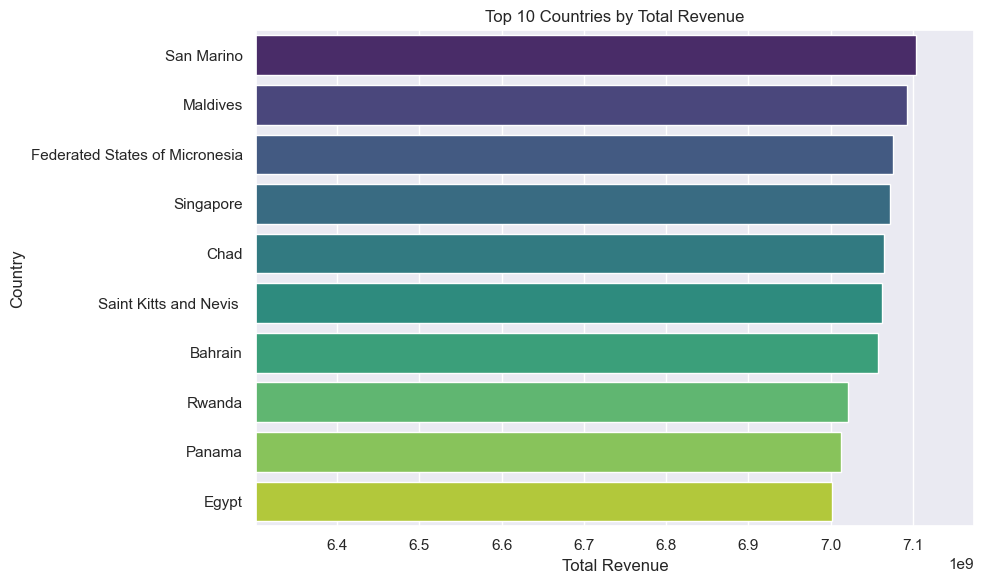

In [174]:
# Apply seaborn theme
sns.set_theme()

# Get top 10 countries by total revenue
top_countries = df.groupby('Country')['Total Revenue'].sum().nlargest(10).sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Revenue')

# Set custom x-axis limits for better spacing
min_limit = top_countries.min() * 0.9  # 90% of the lowest top-10 value
plt.xlim(min_limit, top_countries.max()*1.01)

plt.tight_layout()
plt.show()

In [175]:
df['Profit per Unit']=df['Total Profit']/df['Units Sold']

In [176]:
df.groupby('Item Type')['Profit per Unit'].mean()

Item Type
Baby Food           95.86
Beverages           15.66
Cereal              88.59
Clothes             73.44
Cosmetics          173.87
Fruits               2.41
Household          165.73
Meat                57.20
Office Supplies    126.25
Personal Care       25.06
Snacks              55.14
Vegetables          63.13
Name: Profit per Unit, dtype: float64

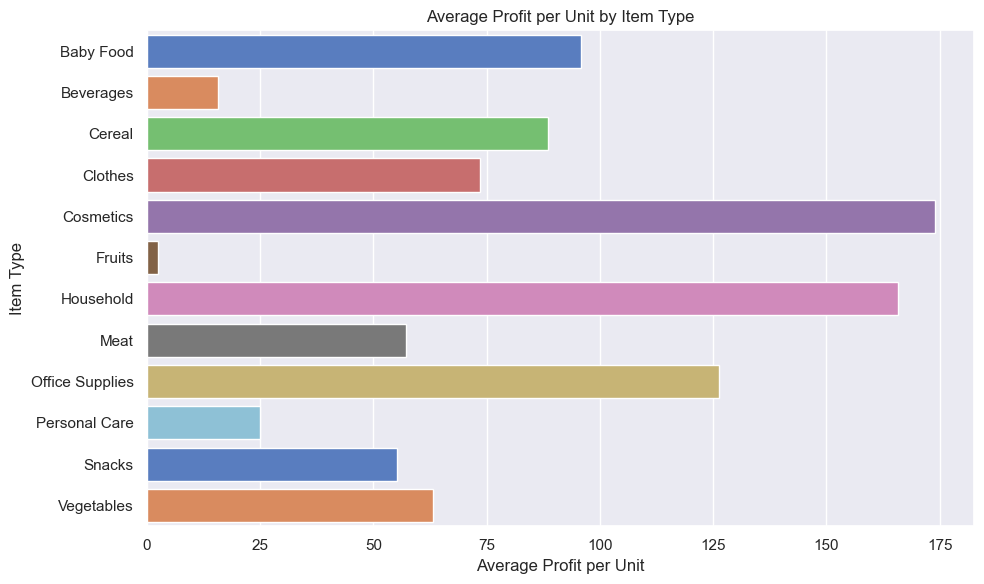

In [177]:
# Apply seaborn theme
sns.set_theme()

# Group by 'Item Type' and calculate average 'Profit per Unit'
item_type_profit = df.groupby('Item Type')['Profit per Unit'].mean()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=item_type_profit.values, y=item_type_profit.index, palette='muted')
plt.xlabel('Average Profit per Unit')
plt.ylabel('Item Type')
plt.title('Average Profit per Unit by Item Type')

plt.tight_layout()
plt.show()

In [184]:
grouped = df_temp.groupby('Item Type')[['Total Profit', 'Total Revenue','Total Cost','Units Sold']].sum()
grouped = grouped.sort_values('Total Revenue', ascending=False)
grouped

,Total Profit,Total Revenue,Total Cost,Units Sold
Item Type,,,,
Household,6.562037e+10,2.645998e+11,1.989794e+11,395947425
Office Supplies,4.979665e+10,2.568560e+11,2.070594e+11,394428880
Cosmetics,6.879915e+10,1.729970e+11,1.041978e+11,395693036
Meat,2.262091e+10,1.668450e+11,1.442241e+11,395470437
Baby Food,3.798808e+10,1.011642e+11,6.317609e+10,396287084
Cereal,3.497211e+10,8.120287e+10,4.623077e+10,394763608
Vegetables,2.482053e+10,6.057107e+10,3.575053e+10,393165441
Snacks,2.186260e+10,6.049683e+10,3.863423e+10,396492511
Clothes,2.905843e+10,4.323946e+10,1.418102e+10,395675847


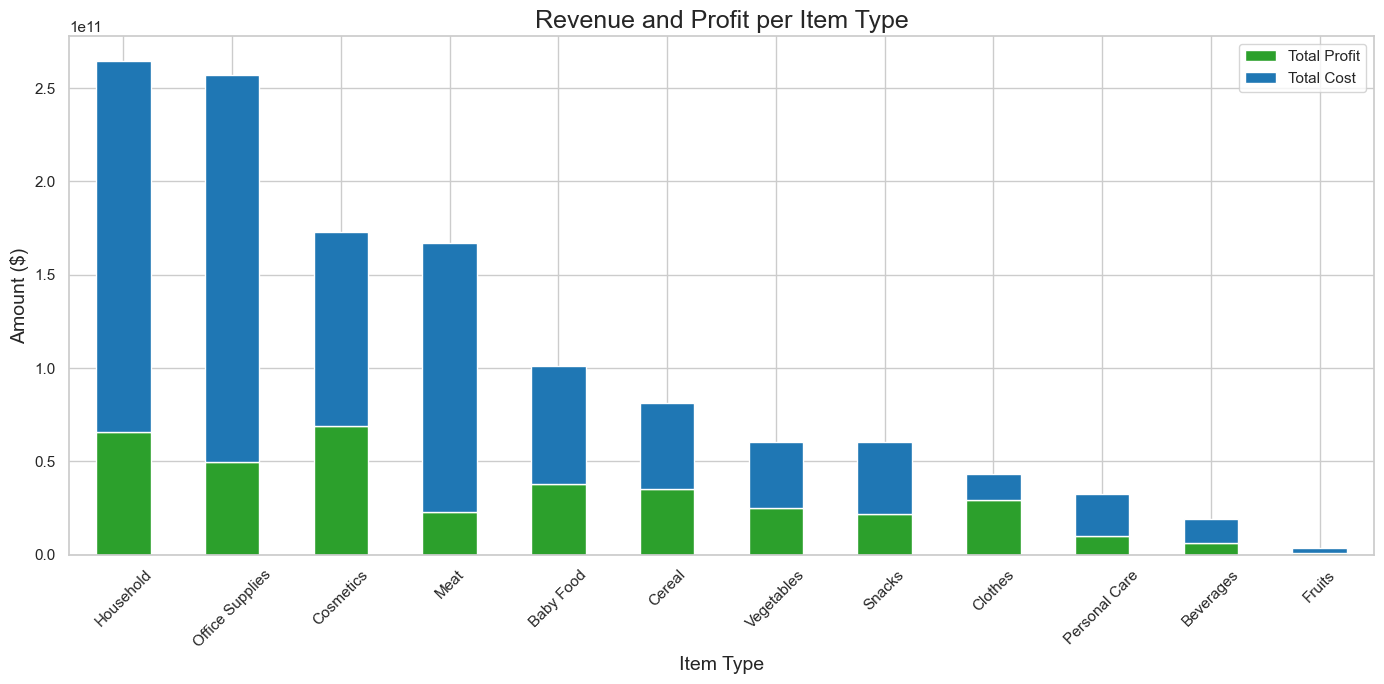

In [185]:
# Plot the stacked bar chart (Total Profit vs Total Cost)
grouped[['Total Profit', 'Total Cost']].plot(
    kind='bar', stacked=True, figsize=(14, 7), color=['tab:green', 'tab:blue']
)

plt.title('Revenue and Profit per Item Type', fontsize=18)
plt.ylabel('Amount ($)', fontsize=14)
plt.xlabel('Item Type', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

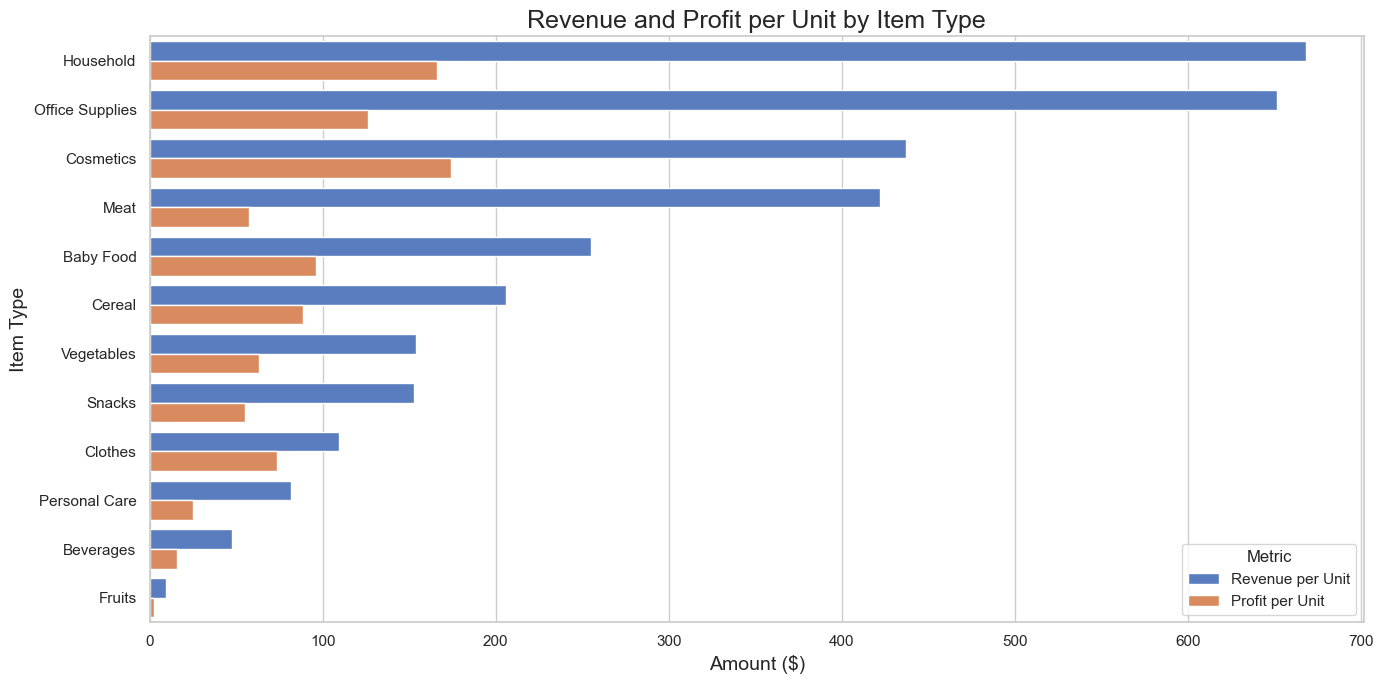

In [188]:
grouped['Revenue per Unit']=grouped['Total Revenue']/grouped['Units Sold']
grouped['Profit per Unit']=grouped['Total Profit']/grouped['Units Sold']
# Prepare data for horizontal barplot
plot_data = grouped[['Revenue per Unit', 'Profit per Unit']].reset_index().melt(id_vars='Item Type', value_vars=['Revenue per Unit', 'Profit per Unit'], var_name='Metric', value_name='Amount')

# Set up the plot
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

# Create the horizontal barplot
sns.barplot(x='Amount', y='Item Type', hue='Metric', data=plot_data, palette='muted')

# Title and labels
plt.title('Revenue and Profit per Unit by Item Type', fontsize=18)
plt.xlabel('Amount ($)', fontsize=14)
plt.ylabel('Item Type', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Demand-Oriented Data Visualization

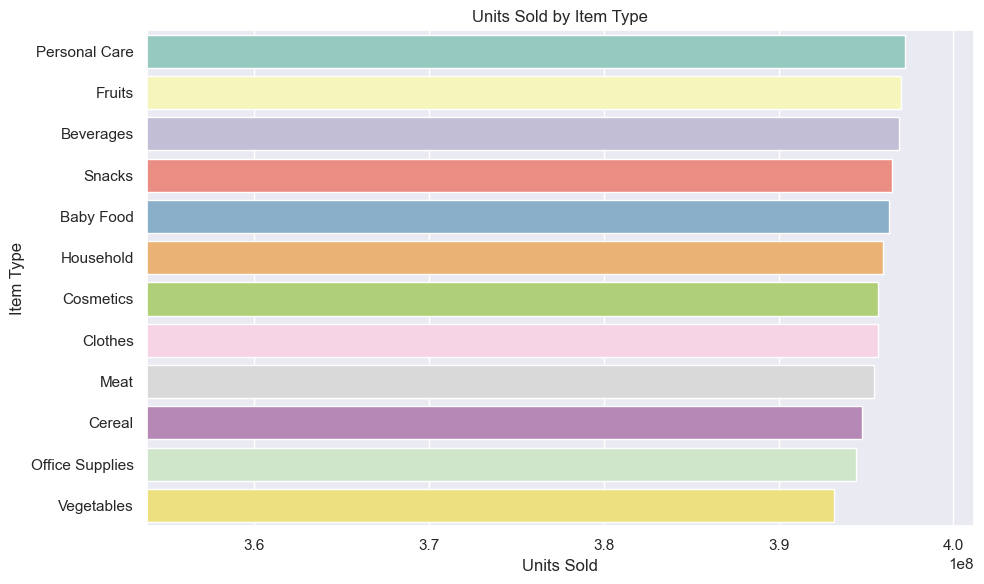

In [178]:
# Apply seaborn theme
sns.set_theme()

# Group by 'Item Type' and calculate average 'Profit per Unit'
item_type_units = df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=item_type_units.values, y=item_type_units.index, palette='Set3')
plt.xlabel('Units Sold')
plt.ylabel('Item Type')
plt.title('Units Sold by Item Type')

# Set custom x-axis limits for better spacing
min_limit = item_type_units.min() * 0.9  # 90% of the lowest top-10 value
plt.xlim(min_limit, item_type_units.max()*1.01)

plt.tight_layout()
plt.show()

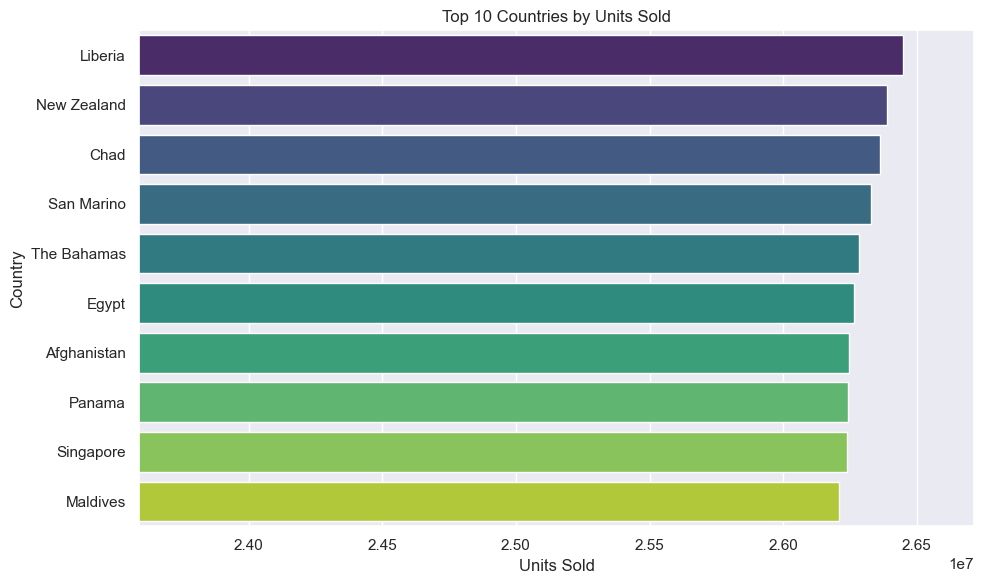

In [179]:
# Apply seaborn theme
sns.set_theme()

# Get top 10 countries by total revenue
top_countries = df.groupby('Country')['Units Sold'].sum().nlargest(10).sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Units Sold')
plt.ylabel('Country')
plt.title('Top 10 Countries by Units Sold')

# Set custom x-axis limits for better spacing
min_limit = top_countries.min() * 0.9  # 90% of the lowest top-10 value
plt.xlim(min_limit, top_countries.max()*1.01)

plt.tight_layout()
plt.show()

In [180]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

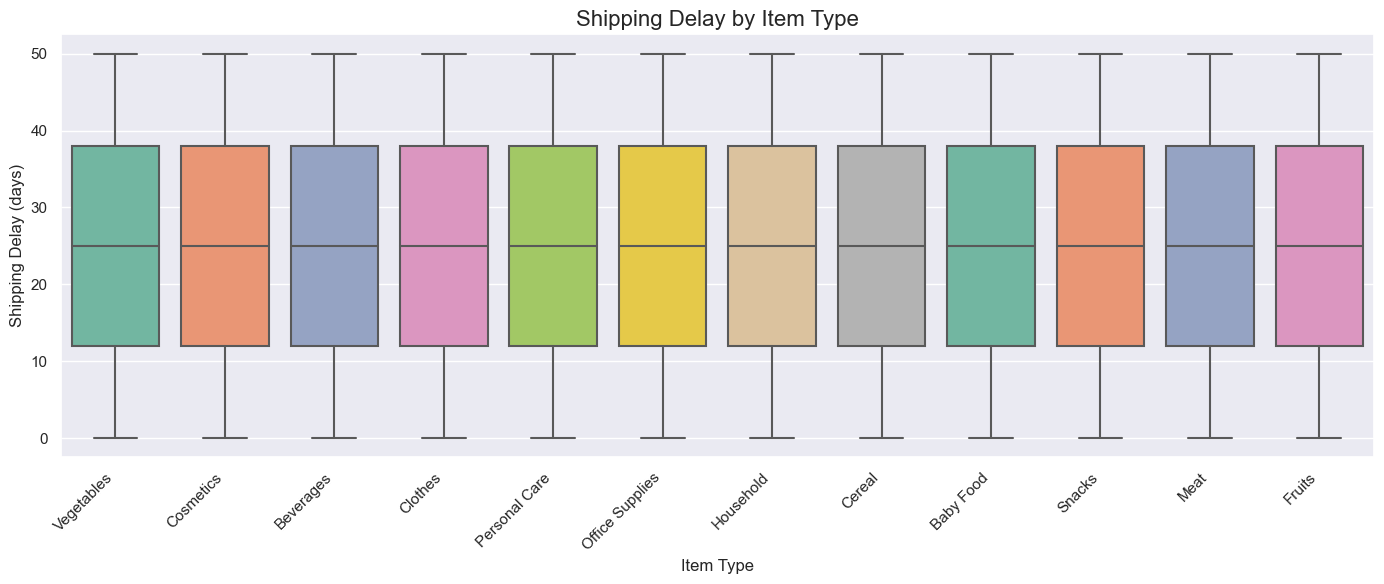

In [181]:
plt.figure(figsize=(14, 6))  # Wider figure for better spacing
sns.boxplot(
    x='Item Type',
    y='Shipping Delay',
    data=df,
    palette='Set2'  # Choose from: 'Set1', 'Set2', 'Set3', 'pastel', 'deep', etc.
)

plt.title('Shipping Delay by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Shipping Delay (days)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [182]:
df_temp = df.copy()
df_temp['Order Date'] = pd.to_datetime(df_temp['Order Date'])
df_temp.set_index('Order Date', inplace=True)

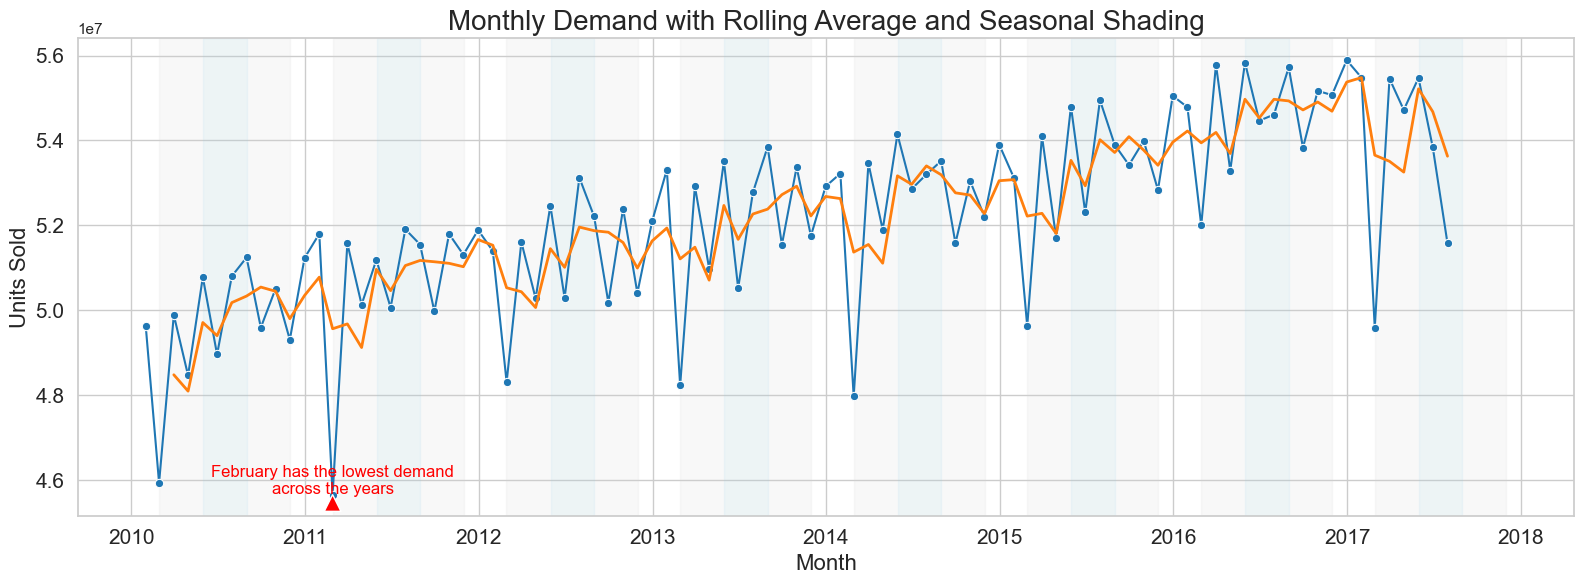

In [183]:
import matplotlib.dates as mdates
monthly_demand = df_temp['Units Sold'].resample('M').sum()

# Plot
plt.figure(figsize=(16, 6))
sns.set_theme(style='whitegrid')

# Calculate 3-month rolling average (you can adjust the window size as needed)
rolling_avg = monthly_demand.rolling(window=3).mean()

# Line plots
sns.lineplot(x=monthly_demand.index, y=monthly_demand.values, label='Monthly Demand', marker='o', color='tab:blue')
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, label='Rolling Average (3-month)', color='tab:orange', linewidth=2)

# Shade rough summer and winter periods (adjust as needed)
for year in monthly_demand.index.year.unique():
    plt.axvspan(pd.to_datetime(f'{year}-06-01'), pd.to_datetime(f'{year}-08-31'), color='skyblue', alpha=0.1)
    plt.axvspan(pd.to_datetime(f'{year}-12-01'), pd.to_datetime(f'{year}-02-28'), color='lightgray', alpha=0.15)

# Annotations for min and max
max_month = monthly_demand.idxmax()
min_month = monthly_demand.idxmin()

# Add annotation for February trend
plt.annotate('February has the lowest demand\nacross the years', 
             xy=(monthly_demand.idxmin(), monthly_demand.min()), 
             xytext=(monthly_demand.idxmin(), monthly_demand.min()+5000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, ha='center', color='red')


# Labels and aesthetics
plt.title('Monthly Demand with Rolling Average and Seasonal Shading', fontsize=20)
plt.legend().remove()
plt.xlabel('Month', fontsize=16)
plt.ylabel('Units Sold', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

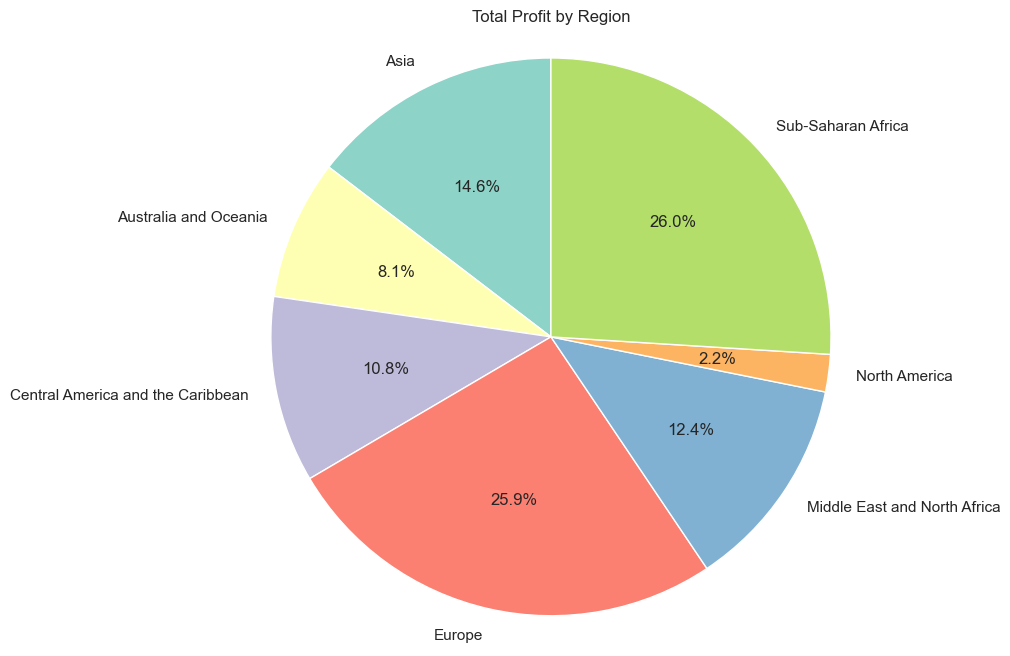

In [189]:
# Group and sum
demand_by_region = df.groupby('Region')['Units Sold'].sum()

# Apply seaborn color palette
colors = sns.color_palette(palette='Set3', n_colors=len(demand_by_region))

# Create pie chart with specified colors
plt.figure(figsize=(8, 8))
plt.pie(demand_by_region, labels=demand_by_region.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Total Profit by Region')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

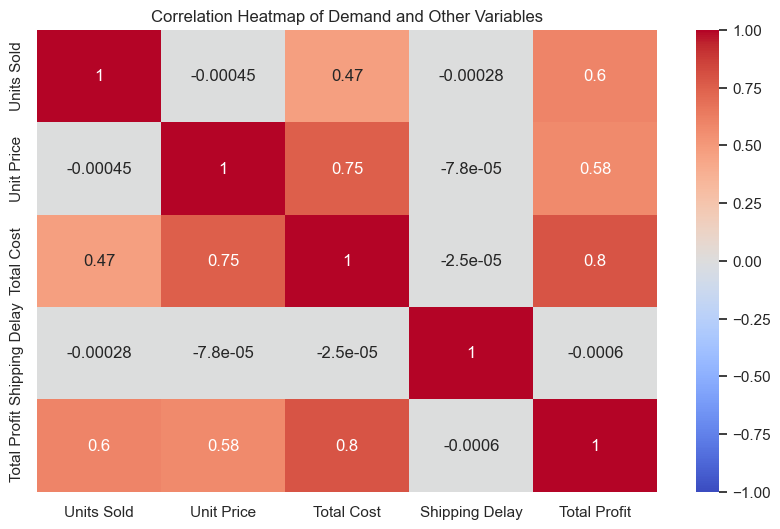

In [190]:
# Calculate correlations
correlation_matrix = df[['Units Sold', 'Unit Price', 'Total Cost', 'Shipping Delay', 'Total Profit']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Demand and Other Variables')
plt.show()

# Feature Engineering

In [232]:
df_modeling=df.copy()

In [233]:
# Extract time-based features
df_modeling['Year'] = df_modeling['Order Date'].dt.year
df_modeling['Month'] = df_modeling['Order Date'].dt.month
df_modeling['Day'] = df_modeling['Order Date'].dt.day
df_modeling['DayOfWeek'] = df_modeling['Order Date'].dt.dayofweek         # Monday=0, Sunday=6
df_modeling['IsWeekend'] = df_modeling['DayOfWeek'].isin([5, 6]).astype(int)
df_modeling['Quarter'] = df_modeling['Order Date'].dt.quarter
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_modeling['Season'] = df_modeling['Month'].apply(get_season)

In [234]:
df_modeling['Lag_1'] = df_modeling['Units Sold'].shift(1)   
df_modeling['Lag_2'] = df_modeling['Units Sold'].shift(2)   
df_modeling['Lag_3'] = df_modeling['Units Sold'].shift(3) 
df_modeling['Lag_6'] = df_modeling['Units Sold'].shift(6) 
df_modeling['Lag_12'] = df_modeling['Units Sold'].shift(12) 

In [235]:
# Rolling averages over 3 and 6 months
df_modeling['Rolling_Mean_3'] = df_modeling['Units Sold'].shift(1).rolling(window=3).mean()
df_modeling['Rolling_Mean_6'] = df_modeling['Units Sold'].shift(1).rolling(window=6).mean()

In [236]:
# Drop rows with NaNs created by lag/rolling features
df_modeling = df_modeling.dropna().reset_index(drop=True)

In [237]:
df_modeling.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Profit per Unit', 'Shipping Delay', 'Year', 'Month', 'Day',
       'DayOfWeek', 'IsWeekend', 'Quarter', 'Season', 'Lag_1', 'Lag_2',
       'Lag_3', 'Lag_6', 'Lag_12', 'Rolling_Mean_3', 'Rolling_Mean_6'],
      dtype='object')

In [238]:
# Encoding 'Season' as ordinal
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df_modeling['Season_Encoded'] = df_modeling['Season'].map(season_mapping)

# Encoding 'Order Priority' as ordinal
order_priority_mapping = {'L': 1, 'M': 2, 'H': 3, 'C': 4}
df_modeling['Order_Priority_Encoded'] = df_modeling['Order Priority'].map(order_priority_mapping)

# Encoding 'Sales Channel' as binary (Online=1, Offline=0)
df_modeling['Sales_Channel_Encoded'] = df_modeling['Sales Channel'].map({'Online': 1, 'Offline': 0})

# Drop original categorical columns if no longer needed
df_modeling.drop(['Season', 'Order Priority', 'Sales Channel'], axis=1, inplace=True)

In [239]:
from sklearn.preprocessing import OneHotEncoder

# Target Encoding for Country
country_mean_encoding = df_modeling.groupby('Country')['Units Sold'].mean()
df_modeling['Country_encoded'] = df_modeling['Country'].map(country_mean_encoding)

# One-Hot Encoding for Region
df_modeling = pd.get_dummies(df_modeling, columns=['Region'], drop_first=True)

# One-Hot Encoding for Item Type
df_modeling = pd.get_dummies(df_modeling, columns=['Item Type'], drop_first=True)

In [240]:
# Check the new encoded DataFrame
df_modeling.head()

,Country,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,...,Item Type_Cereal,Item Type_Clothes,Item Type_Cosmetics,Item Type_Fruits,Item Type_Household,Item Type_Meat,Item Type_Office Supplies,Item Type_Personal Care,Item Type_Snacks,Item Type_Vegetables
0,Rwanda,2010-01-01,738972461,2010-01-06,7228,255.28,159.42,1845163.84,1152287.76,692876.08,...,0,0,0,0,0,0,0,0,0,0
1,Iran,2010-01-01,196540105,2010-01-12,9439,668.27,502.54,6307800.53,4743475.06,1564325.47,...,0,0,0,0,1,0,0,0,0,0
2,Nepal,2010-01-01,716223466,2010-02-09,5294,154.06,90.93,815593.64,481383.42,334210.22,...,0,0,0,0,0,0,0,0,0,1
3,Sri Lanka,2010-01-01,146712815,2010-01-29,4437,154.06,90.93,683564.22,403456.41,280107.81,...,0,0,0,0,0,0,0,0,0,1
4,Romania,2010-01-01,134196984,2010-02-03,725,152.58,97.44,110620.50,70644.00,39976.50,...,0,0,0,0,0,0,0,0,1,0


In [241]:
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949979 entries, 0 to 949978
Data columns (total 46 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Country                                   949979 non-null  object        
 1   Order Date                                949979 non-null  datetime64[ns]
 2   Order ID                                  949979 non-null  int64         
 3   Ship Date                                 949979 non-null  datetime64[ns]
 4   Units Sold                                949979 non-null  int64         
 5   Unit Price                                949979 non-null  float64       
 6   Unit Cost                                 949979 non-null  float64       
 7   Total Revenue                             949979 non-null  float64       
 8   Total Cost                                949979 non-null  float64       
 9   Total Profit   

# Modeling

In [231]:
X

,Unit Price,Shipping Delay,Year,Month,Day,DayOfWeek,IsWeekend,Quarter,Lag_1,Lag_2,...,Item Type_Cereal,Item Type_Clothes,Item Type_Cosmetics,Item Type_Fruits,Item Type_Household,Item Type_Meat,Item Type_Office Supplies,Item Type_Personal Care,Item Type_Snacks,Item Type_Vegetables
0,255.28,5,2010,1,1,4,0,1,6155.0,9938.0,...,0,0,0,0,0,0,0,0,0,0
1,668.27,11,2010,1,1,4,0,1,7228.0,6155.0,...,0,0,0,0,1,0,0,0,0,0
2,154.06,39,2010,1,1,4,0,1,9439.0,7228.0,...,0,0,0,0,0,0,0,0,0,1
3,154.06,28,2010,1,1,4,0,1,5294.0,9439.0,...,0,0,0,0,0,0,0,0,0,1
4,152.58,33,2010,1,1,4,0,1,4437.0,5294.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949974,255.28,50,2017,7,29,5,1,3,4506.0,9787.0,...,0,0,0,0,0,0,0,0,0,0
949975,437.20,19,2017,7,29,5,1,3,2935.0,4506.0,...,0,0,1,0,0,0,0,0,0,0
949976,437.20,20,2017,7,29,5,1,3,363.0,2935.0,...,0,0,1,0,0,0,0,0,0,0
949977,255.28,9,2017,7,29,5,1,3,2292.0,363.0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
# First, sort the dataset by 'Date'
df_modeling = df_modeling.sort_values(by='Order Date')

# Calculate the split index (80% for training and 20% for testing)
split_idx = int(len(df_modeling) * 0.8)

# Split the data into training and testing sets
train_data = df_modeling[:split_idx]
test_data = df_modeling[split_idx:]

# Separate the features (X) and target (y) for both training and testing
X_train = train_data.drop(columns=[
    'Order ID', 'Order Date', 'Ship Date', 'Units Sold', 'Unit Cost',
    'Total Revenue', 'Total Cost', 'Total Profit', 'Profit per Unit'
])
y_train = train_data['Units Sold']

X_test = test_data.drop(columns=['Units Sold', 'Order ID'])
y_test = test_data['Units Sold']

# Confirm the sizes
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 759983 rows
Test set size: 189996 rows


In [243]:
print(f"Training data date range: {train_data['Order Date'].min()} to {train_data['Order Date'].max()}")
print(f"Test data date range: {test_data['Order Date'].min()} to {test_data['Order Date'].max()}")

Training data date range: 2010-01-01 00:00:00 to 2016-02-15 00:00:00
Test data date range: 2016-02-15 00:00:00 to 2017-07-29 00:00:00
